# Task 2, Machine Learning with Matrix Data for Recommender Systems

Name: Vinayak Ramachandra Bhosale

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/ratings_small.csv")
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [4]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195798 sha256=177ef599e3f1d09e743dd669019f7a9fc1ee148bb5b842da90a9b88d63bc1db5
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


question C

In [5]:
from surprise import SVD, KNNBasic, KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('/content/ratings_small.csv', reader=reader)

# Define models
pmf = SVD(biased=False)
user_cf = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
item_cf = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})

# Evaluate models using 5-fold cross-validation
pmf_cv = cross_validate(pmf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
user_cf_cv = cross_validate(user_cf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
item_cf_cv = cross_validate(item_cf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

# Print the average MAE and RMSE for each model
print('PMF: MAE={:.4f}, RMSE={:.4f}'.format(pmf_cv['test_mae'].mean(), pmf_cv['test_rmse'].mean()))
print('User-based CF: MAE={:.4f}, RMSE={:.4f}'.format(user_cf_cv['test_mae'].mean(), user_cf_cv['test_rmse'].mean()))
print('Item-based CF: MAE={:.4f}, RMSE={:.4f}'.format(item_cf_cv['test_mae'].mean(), item_cf_cv['test_rmse'].mean()))


Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7826  0.7720  0.7812  0.7799  0.7775  0.7786  0.0037  
RMSE (testset)    1.0104  1.0008  1.0131  1.0109  1.0059  1.0082  0.0044  
Fit time          1.23    1.27    1.70    1.60    1.47    1.45    0.18    
Test time         0.14    0.13    0.22    0.34    0.13    0.19    0.08    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7749  0.7693  0.7603  0.7628  0.7689 

question e

In [6]:
user_cf_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
user_cf_msd = KNNBasic(sim_options={'name': 'msd', 'user_based': True})
user_cf_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': True})

item_cf_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
item_cf_msd = KNNBasic(sim_options={'name': 'msd', 'user_based': False})
item_cf_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': False})

user_cf_cosine_cv = cross_validate(user_cf_cosine, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
user_cf_msd_cv = cross_validate(user_cf_msd, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
user_cf_pearson_cv = cross_validate(user_cf_pearson, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)


item_cf_cosine_cv = cross_validate(item_cf_cosine, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
item_cf_msd_cv = cross_validate(item_cf_msd, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
item_cf_pearson_cv = cross_validate(item_cf_pearson, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7728  0.7700  0.7589  0.7628  0.7698  0.7669  0.0052  
RMSE (testset)    0.9998  0.9956  0.9860  0.9868  0.9970  0.9930  0.0056  
Fit time          0.36    0.30    0.15    0.17    0.17    0.23    0.08    
Test time         3.66    2.43    1.59    1.45    1.60    2.14    0.83    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

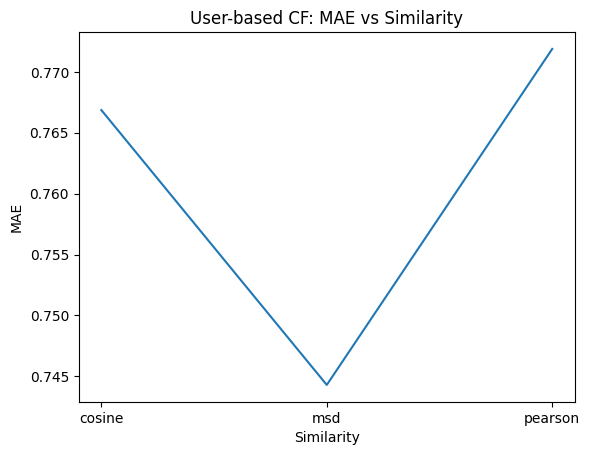

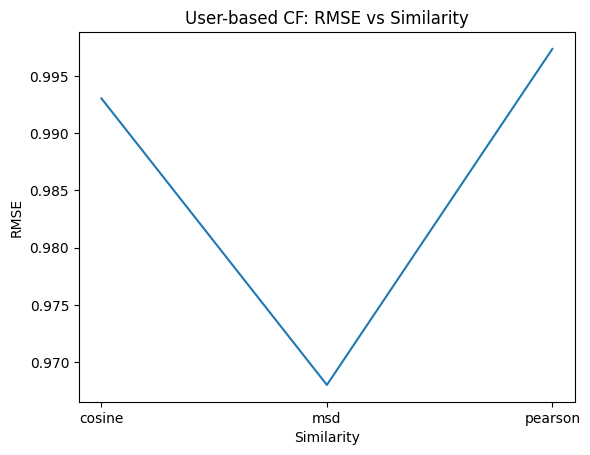

In [10]:
import matplotlib.pyplot as plt

sim_labels = ['cosine', 'msd', 'pearson']
mae_values = [user_cf_cosine_cv['test_mae'].mean(), user_cf_msd_cv['test_mae'].mean(), user_cf_pearson_cv['test_mae'].mean()]
rmse_values = [user_cf_cosine_cv['test_rmse'].mean(), user_cf_msd_cv['test_rmse'].mean(), user_cf_pearson_cv['test_rmse'].mean()]

plt.plot(sim_labels, mae_values)
plt.title('User-based CF: MAE vs Similarity')
plt.xlabel('Similarity')
plt.ylabel('MAE')
plt.show()

plt.plot(sim_labels, rmse_values)
plt.title('User-based CF: RMSE vs Similarity')
plt.xlabel('Similarity')
plt.ylabel('RMSE')
plt.show()

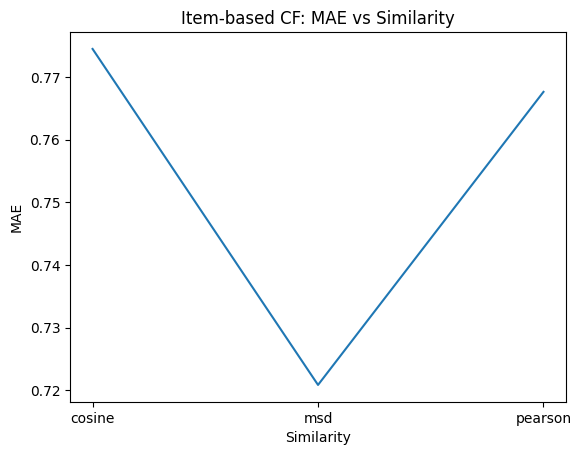

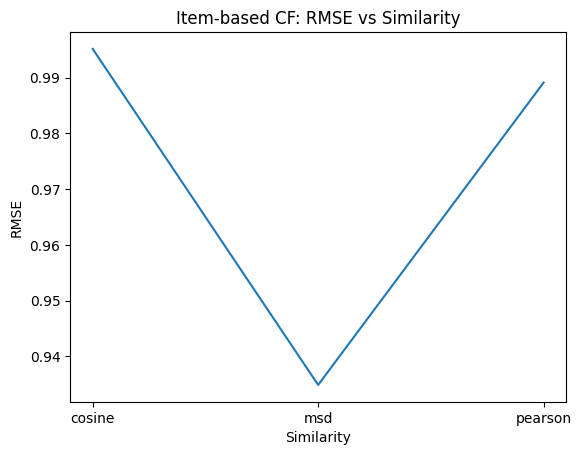

In [11]:
mae_values = [item_cf_cosine_cv['test_mae'].mean(), item_cf_msd_cv['test_mae'].mean(), item_cf_pearson_cv['test_mae'].mean()]
rmse_values = [item_cf_cosine_cv['test_rmse'].mean(), item_cf_msd_cv['test_rmse'].mean(), item_cf_pearson_cv['test_rmse'].mean()]

plt.plot(sim_labels, mae_values)
plt.title('Item-based CF: MAE vs Similarity')
plt.xlabel('Similarity')
plt.ylabel('MAE')
plt.show()

plt.plot(sim_labels, rmse_values)
plt.title('Item-based CF: RMSE vs Similarity')
plt.xlabel('Similarity')
plt.ylabel('RMSE')
plt.show()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.8753  0.8788  0.8905  0.8778  0.8847  0.8814  0.0055  
RMSE (testset)    1.1392  1.1440  1.1554  1.1439  1.1506  1.1466  0.0057  
Fit time          0.17    0.17    0.17    0.18    0.17    0.17    0.01    
Test time         0.93    0.94    0.93    0.94    1.14    0.98    0.08    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

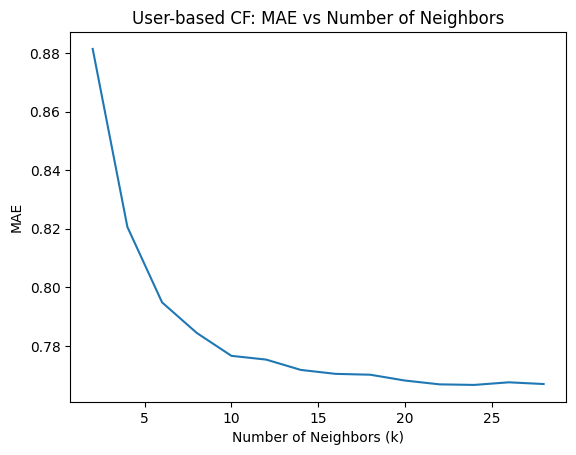

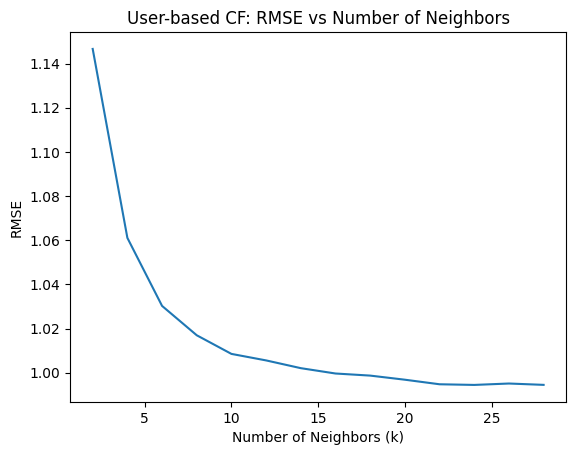

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.9417  0.9437  0.9472  0.9417  0.9399  0.9428  0.0025  
RMSE (testset)    1.2179  1.2257  1.2261  1.2221  1.2209  1.2225  0.0031  
Fit time          5.85    6.53    6.03    5.99    6.15    6.11    0.23    
Test time         4.78    5.17    5.07    5.16    6.28    5.29    0.51    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

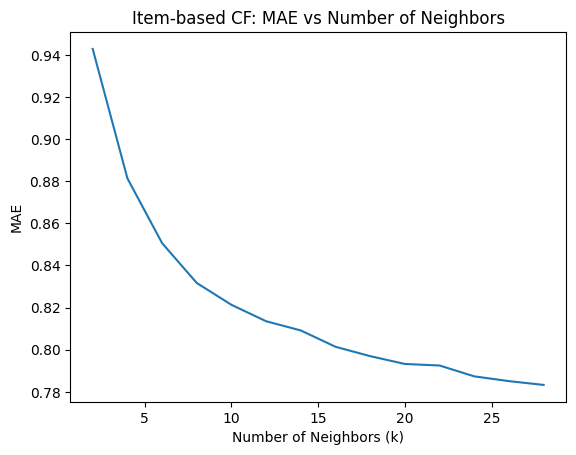

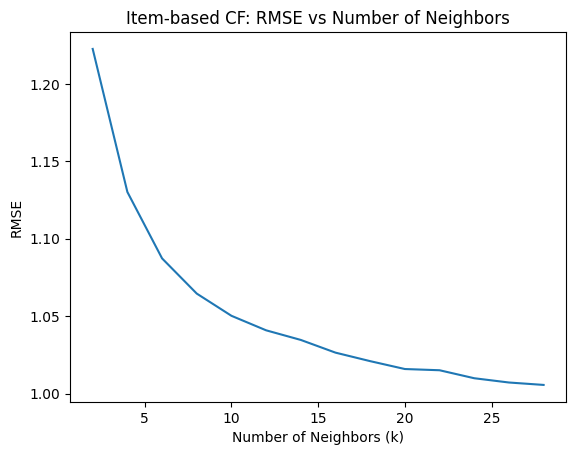

In [9]:
user_cf_k_values = range(2, 30, 2)

# User-based CF
mae_values = []
rmse_values = []

for k in user_cf_k_values:
    user_cf_k = KNNBasic(k=k, sim_options={'name': 'cosine', 'user_based': True})
    user_cf_k_cv = cross_validate(user_cf_k, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    mae_values.append(user_cf_k_cv['test_mae'].mean())
    rmse_values.append(user_cf_k_cv['test_rmse'].mean())

plt.plot(user_cf_k_values, mae_values)
plt.title('User-based CF: MAE vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('MAE')
plt.show()

plt.plot(user_cf_k_values, rmse_values)
plt.title('User-based CF: RMSE vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.show()

item_cf_k_values = range(2, 30, 2)
mae_values = []
rmse_values = []

for k in item_cf_k_values:
    item_cf_k = KNNBasic(k=k, sim_options={'name': 'cosine', 'user_based': False})
    item_cf_k_cv = cross_validate(item_cf_k, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    mae_values.append(item_cf_k_cv['test_mae'].mean())
    rmse_values.append(item_cf_k_cv['test_rmse'].mean())

plt.plot(item_cf_k_values, mae_values)
plt.title('Item-based CF: MAE vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('MAE')
plt.show()

plt.plot(item_cf_k_values, rmse_values)
plt.title('Item-based CF: RMSE vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.show()


In [12]:
import numpy as np

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1529  1.1483  1.1433  1.1429  1.1462  1.1467  0.0037  
Fit time          0.28    0.17    0.18    0.18    0.24    0.21    0.04    
Test time         1.38    0.99    0.92    1.25    1.62    1.23    0.25    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix

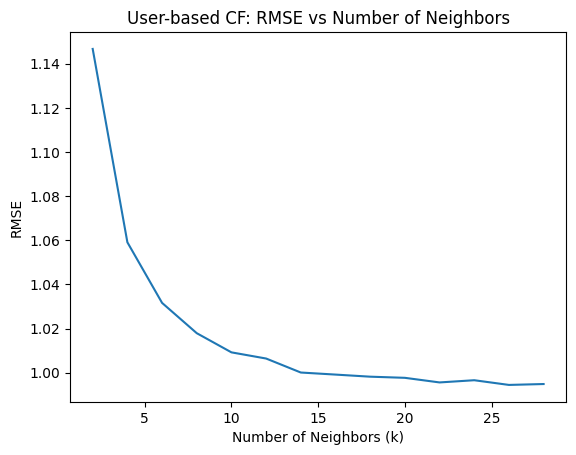

Best number of neighbors for User-based CF in terms of RMSE: 26
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2126  1.2262  1.2364  1.2401  1.2271  1.2285  0.0096  
Fit time          6.60    6.31    6.24    6.17    6.02    6.27    0.19    
Test time         5.42    5.04    5.46    5.15    5.67    5.35    0.22    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done com

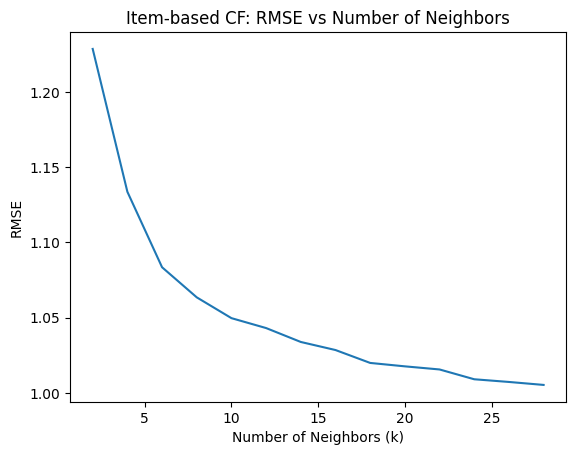

Best number of neighbors for Item-based CF in terms of RMSE: 28


In [13]:
# User-based CF
user_cf_k_values = range(2, 30, 2)
rmse_values = []

for k in user_cf_k_values:
    user_cf_k = KNNBasic(k=k, sim_options={'name': 'cosine', 'user_based': True})
    user_cf_k_cv = cross_validate(user_cf_k, data, measures=['RMSE'], cv=5, verbose=True)
    rmse_values.append(user_cf_k_cv['test_rmse'].mean())

plt.plot(user_cf_k_values, rmse_values)
plt.title('User-based CF: RMSE vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.show()

best_k_user_cf = user_cf_k_values[np.argmin(rmse_values)]
print(f'Best number of neighbors for User-based CF in terms of RMSE: {best_k_user_cf}')

# Item-based CF
item_cf_k_values = range(2, 30, 2)
rmse_values = []

for k in item_cf_k_values:
    item_cf_k = KNNBasic(k=k, sim_options={'name': 'cosine', 'user_based': False})
    item_cf_k_cv = cross_validate(item_cf_k, data, measures=['RMSE'], cv=5, verbose=True)
    rmse_values.append(item_cf_k_cv['test_rmse'].mean())

plt.plot(item_cf_k_values, rmse_values)
plt.title('Item-based CF: RMSE vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.show()

best_k_item_cf = item_cf_k_values[np.argmin(rmse_values)]
print(f'Best number of neighbors for Item-based CF in terms of RMSE: {best_k_item_cf}')

